## Stack Overflow Tag Network




### Introduction:
StackOverflow is a platform where students and professionals post queries and answer questions about programming. It is a platform to showcase their knowledge. It is owned by the StackExchange Network. The answers are upvoted based on its usefulness to the community. Users can also use StackOverflow to advance their careers & enhance their skills. It is a community of more than seven million programmers.

Along with questions, students and professionals also creates their Developer Stories in Stack Overflow.They are designed to give a full picture of a students/professionals based on what they know and built. Stories gives insight into their proficiency in different technologies, open source contributions, blogs, applications and websites they’ve built, Stack Overflow activity, and much more. Technology tags is a part of their profile which highlight's their preferred tools and languages. Each tag represents a specific technology that the candidate has used, likes or dislikes. Thus technology tags on Developer Stroies is the great way to analyze the relation between various technologies.

### Objective:

Being in the IT company, we spend a lot of time and energy thinking about tech ecosystems and how technologies are related to each other. One way to get at this idea of relationships between technologies is tag correlations, how often technology tags at Stack Overflow appear together relative to how often they appear separately. One place we see developers using tags at Stack Overflow is on their Developer Stories, or professional profiles/CVs/resumes. It will be interesting to know how technologies are connected and how they are used together, developers' own descriptions of their work and careers is a great place to get that.

Our analysis will help the people from various background. For experienced person s it will help them to understand the technologies which is related or attached to there current field or area of expertise so they can develop new skills, Even if someone wants to change their domain in IT suppose from frontend to backend or full-stack, what are the popular technologies developers are using currently they can easily able to identify from this type of analysis and if will think this from fresh graduate perspective or someone who is new to IT world, This will help them to understand the fastest growing technologies, which they can learn in coming days to scale up their skills and full-fill requirement of the different companies.

Here, we carry out an analysis of the Stack Overflow tags viewed as a network, or a graph. Specifically,
we aim to get some insight about the user communities by representing tags and their cooccurrences as a graph, where the graph nodes are the tags themselves, and an edge between two nodes exists if the corresponding tags are found together in the same Stack Overflow Developer Stories. The resulting network edges are weighted, i.e., the more stories exist with two tags co-occurring, the higher the weight of the relevant edge between them will be.

In graph terminology, the resulting graph is a weighted undirected one.

### Problem Statements:

    1) How technologies relate to each other in the network.
    2) How often technology appears together.
    3) Analyzing the busiest node and try to identify the reason behind it.
    4) Which technology has the greatest number of centrality and which has least number of centrality.
    5) Analyzing different clusters for each programming language and family pattern like android with java or embedded systems with C and C++.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
import itertools
from networkx.algorithms import community as comm
import community
from operator import itemgetter
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/Network project/Data/"
df_nodes = pd.read_csv(path+ 'stack_network_nodes.csv')

df_edges = pd.read_csv(path+ 'stack_network_links.csv')

df_nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


Tag frequency distribution for the first 10 tags:

Top tags in Stack Overflow Developer Stories:


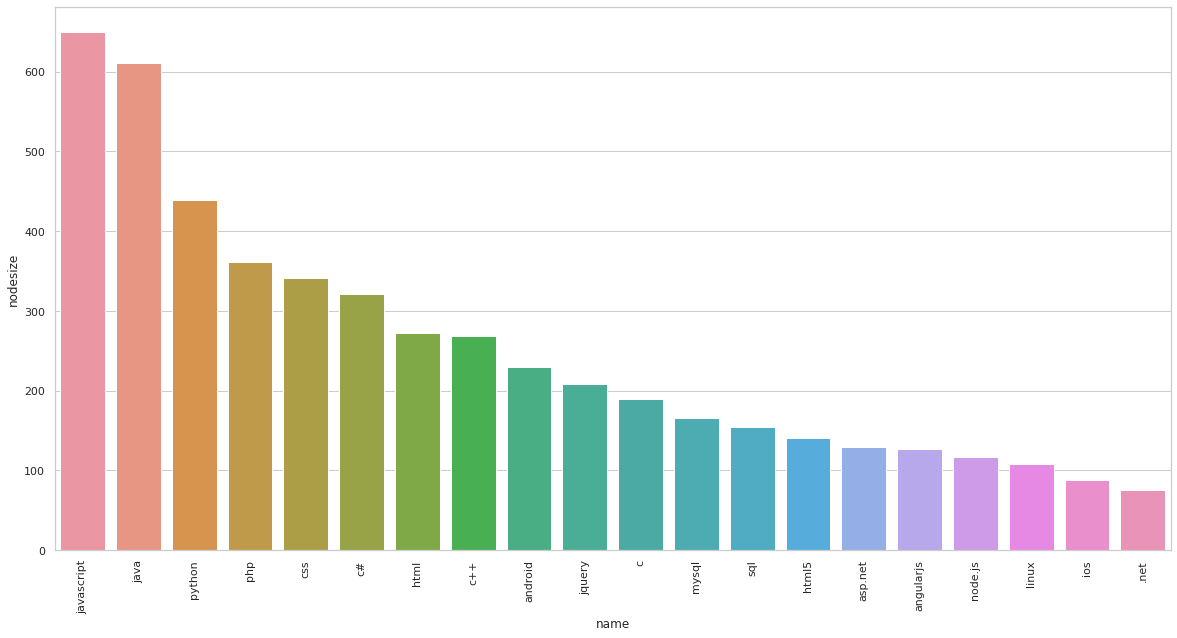

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
plt.xticks(rotation=90)
print("Top tags in Stack Overflow Developer Stories:")
ax = sns.barplot(x="name", y="nodesize", data=df_nodes.sort_values("nodesize",ascending=False)[:20])

In [ ]:
df_edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


### Data Description

```
The dataset include only a subset of tags used on Developer Stories, tags that were used by at least 0.5% of users and were correlated with another tag with a correlation coefficient above 0.1. This means that very sparsely used tags and tags that are not used with other tags were filtered out.
```
Nodes and edges can have metadata associated with them.

__Node metadata :__\
`nodesize` : Proportional to how many developers have that tag in their developer story profile.\
`group` : which group that node belongs to (calculated via a cluster walktrap).

__Edge metadata :__\
`value` : proportional to how correlated those two tags are (correlation coefficient * 100).

In [ ]:
G = nx.Graph(day = 'StackOverflow')
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

### Network Visualization

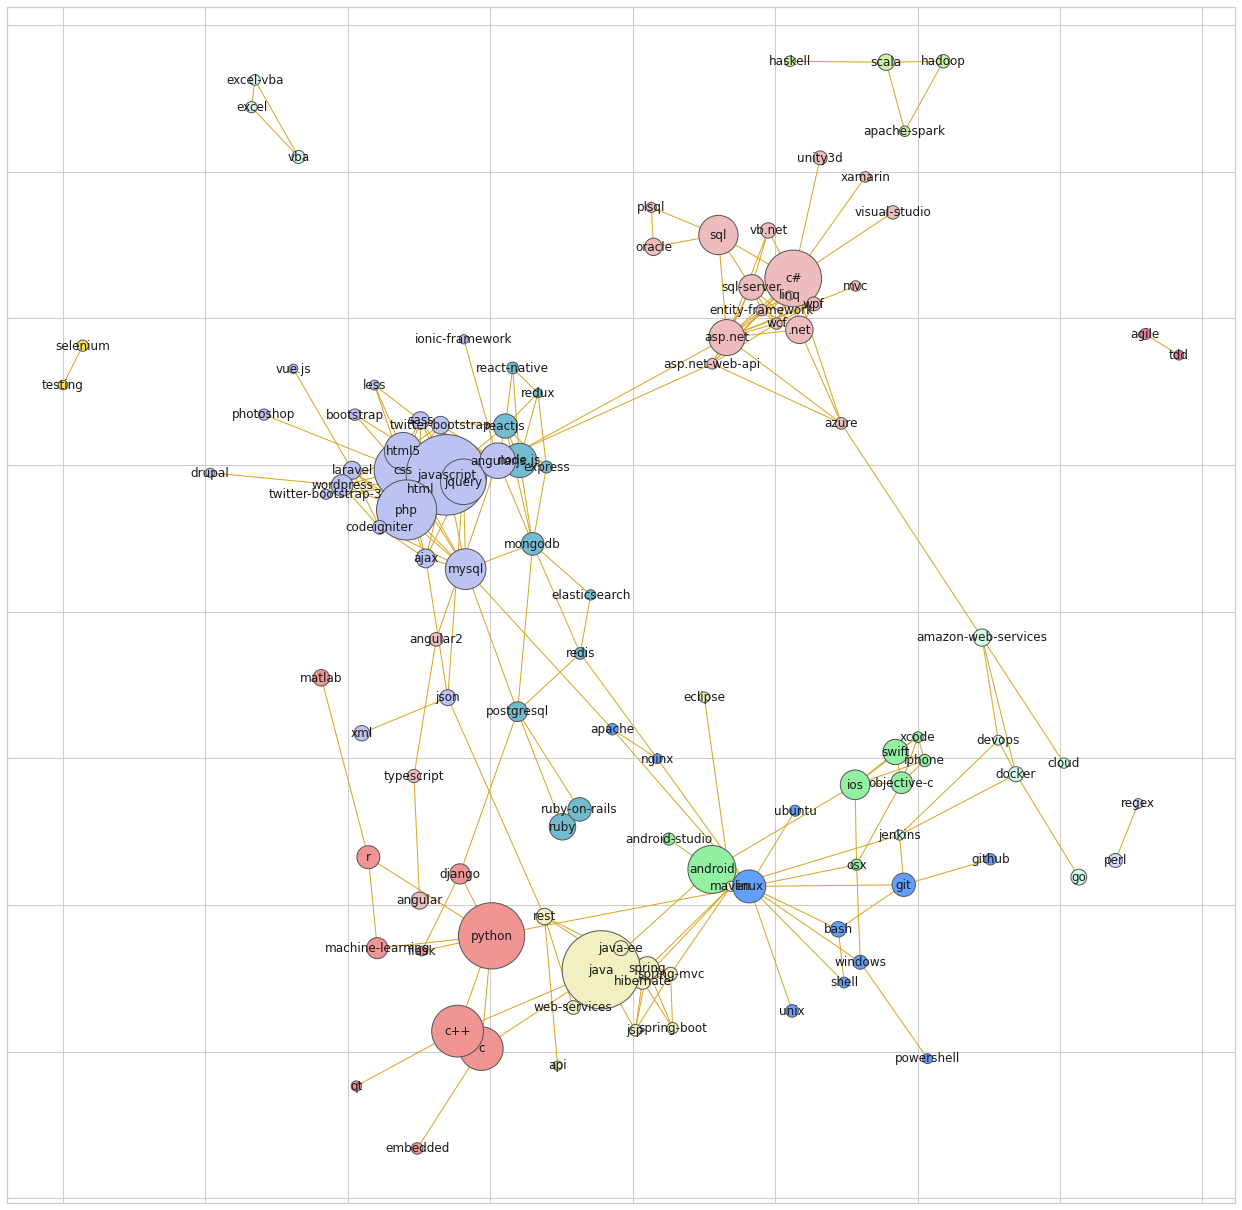

In [ ]:
def draw_graph(G,pos,size):
    nodes = G.nodes()
    
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    
#     pos = nx.drawing.kamada_kawai_layout(G)
# #     position=nx.kamada_kawai_layout(G)
#     pos=nx.shell_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='goldenrod',edge_width=1)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#555555") 
    
    plt.savefig("Clique.png", format="png")
    plt.show()

pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
draw_graph(G,pos,size=(22,22))

### Social Network Analysis metrics
#### Network Data Statistics

After building the network the first thing to check is the number of nodes and edges it consists of.
Degree of a node in an undirected graph shows the number of nodes it's connected to. Average degree is the average of all node's degree.
Stackoverflow tags have an average degree of 4.26 which indicates that on average tags are connected to four other tags.
115 nodes mean there are 115 unique tags which are connected among themselves with 245 edges.


In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


#### Connectivity
A network is connected if there is a path between every pair of vertices. But this tag network is not connected, which means there are some isolated nodes or isolated subgraphs. A connected component is the maximal connected subgraph of a graph. In the tag network we have 6 unique connected components. We can also extract the largest connected component of a graph.

In [ ]:
if (nx.is_connected(G)):
    print("Tag Network is Connected.")
else:
    print("Tag Network is not Connected.")
print("Number of components in Tag Network:",nx.number_connected_components(G))

Tag Network is not Connected.
Number of components in Tag Network: 6


#### Clustering Coefficient 
The local clustering coefficient of a node is the fraction of its direct neighbors that
are themselves direct neighbors (i.e., directly connected); in a social network framework,
for example, it would be the fraction of one’s friends that are also friends themselves.
The average clustering coefficient of the whole graph is simply the average of the nodes’
local clustering coefficients. By definition, both coefficients lie between 0 and 1. 

In [ ]:
cc = nx.clustering(G)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Tag network clustering coefficient:", avg_cc_poli)

Tag network clustering coefficient: 0.46024448980970717


#### Network density

This is simply the ratio of actual edges in the network to all possible edges in the network. In an undirected network like this one, there could be a single edge between any two nodes, but as you saw in the visualization, only a few of those possible edges are actually present. Network density gives you a quick sense of how closely knit your network is.

In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.03737604881769641


The density of our Tag network is approximately 0.03737. On a scale of 0 to 1, not a very dense network, which comports with what you can see in the visualization. A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network): this tag network is on the lower end of that scale, but still far from 0.

### Shortest Path
A shortest path measurement calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations.

In [ ]:
c_sql_path = nx.shortest_path(G, source="sql", target="python")

print("Shortest path between sql and python:", c_sql_path)
print("Length of that path:", len(c_sql_path)-1)

Shortest path between sql and python: ['sql', 'asp.net', 'jquery', 'mysql', 'postgresql', 'django', 'python']
Length of that path: 6


Shortest path will be a list of the nodes that includes the path belween “source” (sql), the “target” (python), and the nodes between them. In this case, we can see that jquery is on the shortest path between them. Since `jquery` and `asp.net` is also a hub (see degree centrality, below) with many connections, we might suppose that several shortest paths run through him as a mediator.



In [ ]:
c_sql_path = nx.shortest_path(G, source="mongodb", target="machine-learning")

print("Shortest path between mongodb and machine-learning:", c_sql_path)
print("Length of that path:", len(c_sql_path)-1)

Shortest path between mongodb and machine-learning: ['mongodb', 'postgresql', 'django', 'python', 'machine-learning']
Length of that path: 4


Here we are observing shortest path between mongodb and machine learning, so result also make sense as framework django (python based framework) is used to develop machine learming application which uses mongodb as database.

#### Diameter

There are many network metrics derived from shortest path lengths. One such measure is diameter, which is the longest of all shortest paths. After calculating all shortest paths between every possible pair of nodes in the network, diameter is the length of the path between the two nodes that are furthest apart. The measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

But as we know the Tag Network is not connected and have 6 unique connected components, Because there are some nodes that have no path at all to others, it is impossible to find all of the shortest paths.

Since there is no shortest path between nodes of one component and nodes of another, finding the largest component and then calculating diameter on that component alone.

In [ ]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)
average_shortest_path_length=nx.average_shortest_path_length(subgraph, weight=None)
print("Average shortest path length:", average_shortest_path_length)

Network diameter of largest component: 10
Average shortest path length: 4.507862550960978


This component has a diameter of 10 — meaning this is the “widest” number of connections between any two tags. The average path length is just around four. This means that, on average, any two languages are separated by four edges. The above  figures give a measure of the “size” of the network.

### Network Visualization of largest componenet in the Tag network

Since we took the largest component, we can assume there is no larger diameter for the other components. Therefore this figure is a good stand in for the diameter of the whole Graph. The network diameter of this network’s largest component is 10: there is a path length of 10 between the two farthest-apart nodes in the network. 

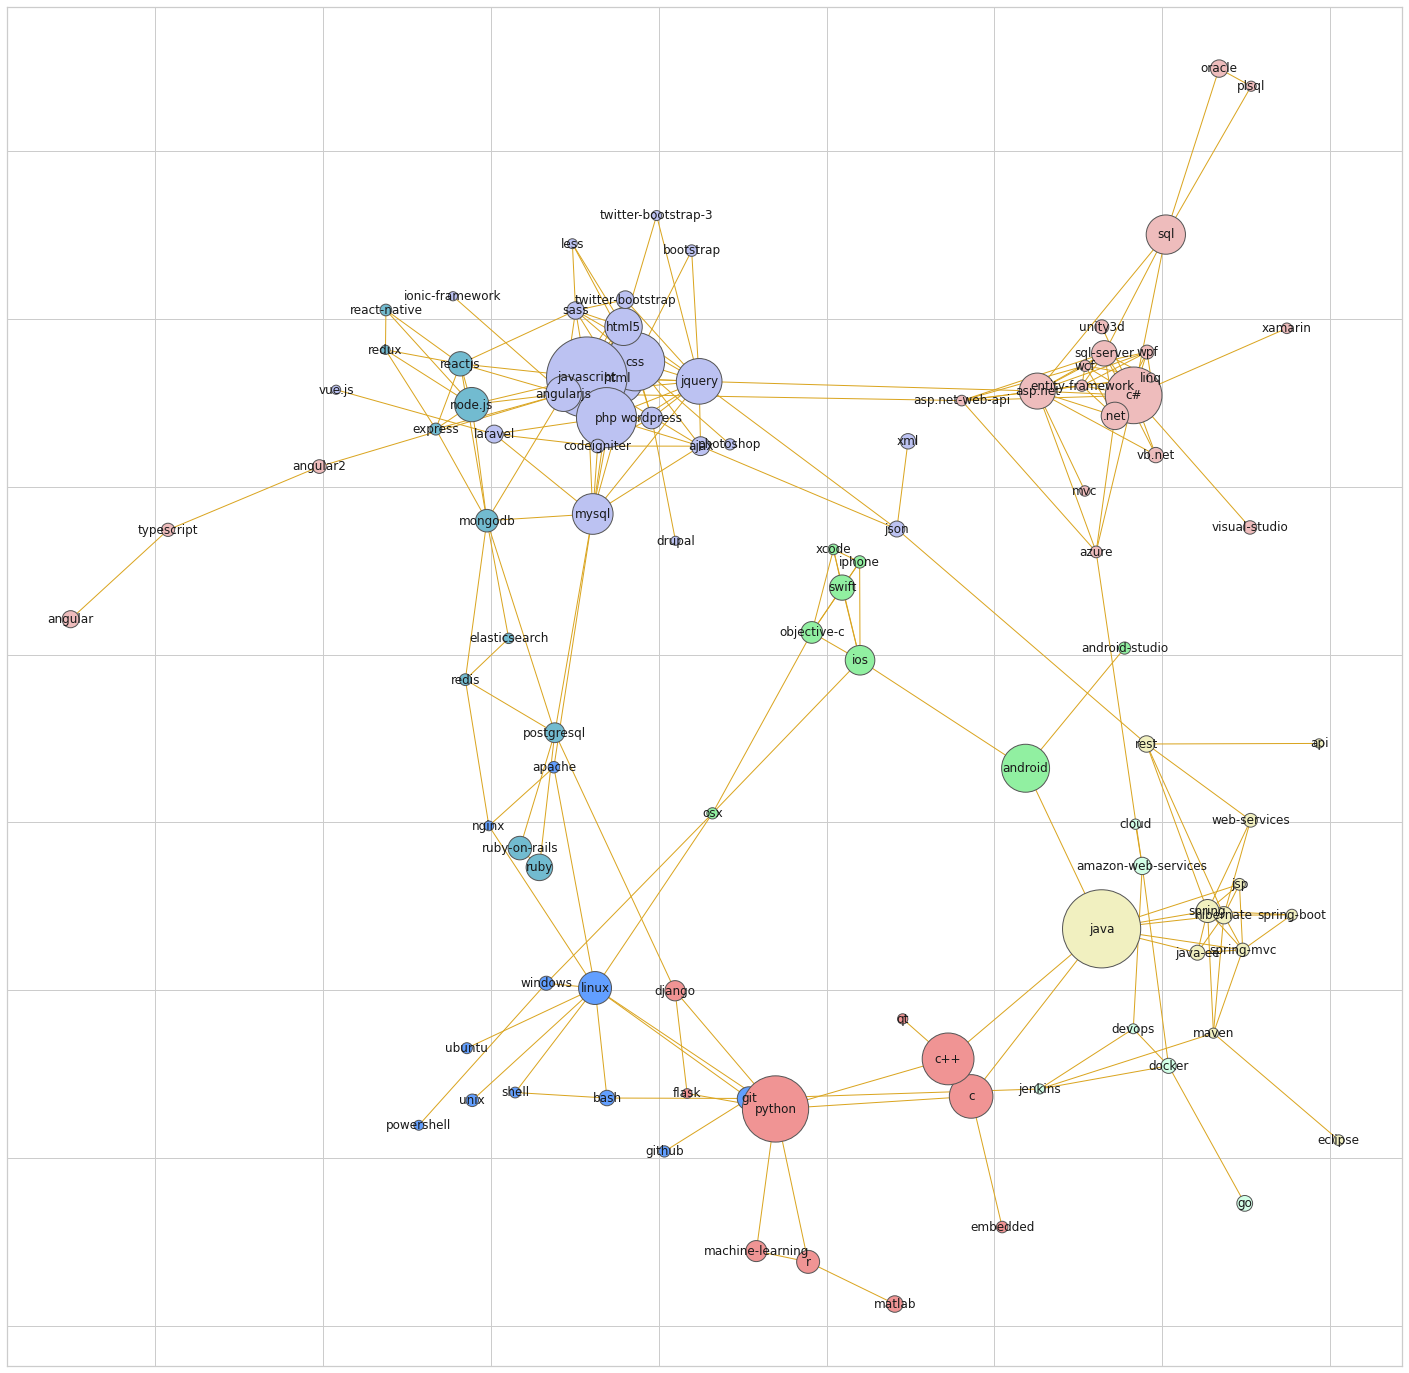

In [ ]:
G_largest_component=G.copy()
small_components = sorted(nx.connected_components(G_largest_component), key=len)[:-1]
G_largest_component.remove_nodes_from(itertools.chain.from_iterable(small_components))
pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
draw_graph(G_largest_component,pos,size=(25,25))

### Visualising Programming Language Network
Since it's possible to draw the subgraph of a graph, a subgraph containing the nodes for the programming languages only can also be visualized. In the visualization its possible to see the different clusters for each programming language and familiar patterns like android with java or embedded systems with C and C++.
These are tags that are more likely to be used by a developer on her or his Developer stories, We can see that what are the other tags which are linked to below popular technologies/language.



In [ ]:
major_languages = ['c','c++','c#','java','python','ruby','scala','haskell','javascript','sql']
p_language_nodes = []
for language in major_languages:
    neighbors = G.neighbors(language)
    p_language_nodes.extend(neighbors)
programming_language_graph = G.subgraph(set(p_language_nodes))

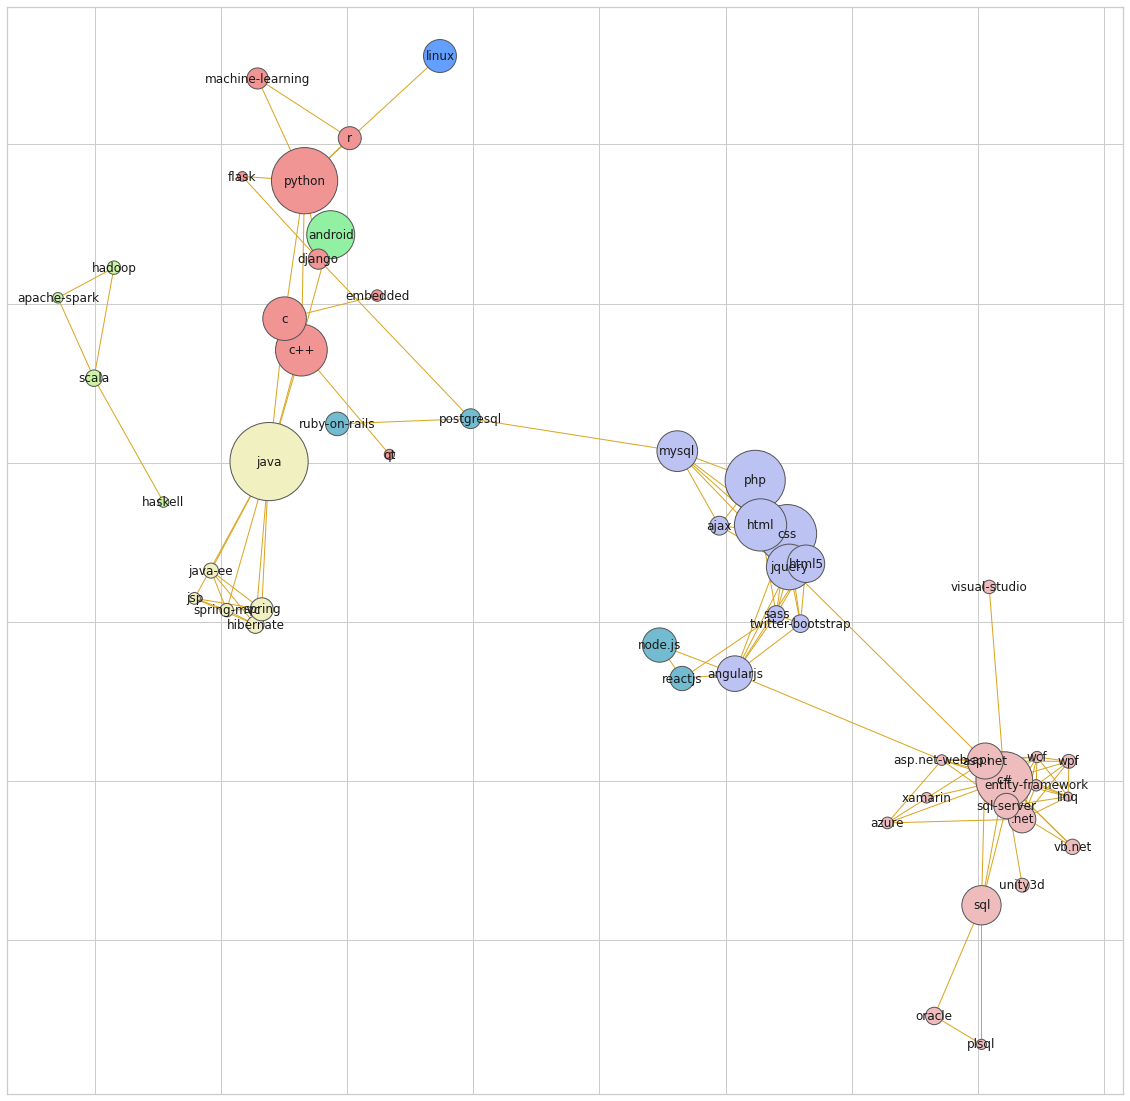

In [ ]:
pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
draw_graph(programming_language_graph,pos,size=(20,20))

### Node Importance: Centrality Measures

After getting some basic measures of the entire network structure, a good next step is to find which nodes are the most important ones in our network. In network analysis, measures of the importance of nodes are referred to as centrality measures. Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. Here we have measured four of the most common centrality measures: degree, betweenness centrality, closeness centrality and eigenvector centrality.

#### Degree Centrality

Degree centrality is one of the easiest to calculate. The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as hubs, and calculating degree is the quickest way of identifying hubs. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

Comparing their Degree Centrality ranking to the frequency ranking of the corresponding tags, we can see that, 'Java', 'JavaScript' tag have highest frequency as compare to others, but 'Java' is not even in the list of top 10 nodes with high degree value and even 'JavaScript' stands in 6th place. Hence this help us to understand that frequency of anything in the network doesn't mean it has high degree or it is connected to many other nodes. It might be chances that particular tag occurs multiple times alone in the developer stories due to which it has very high frequency in the network. Same is true for tags like 'java' & 'javascript'.



In [ ]:
def draw(G, pos, measure, measure_name):
    plt.figure(figsize=(25,15))
    options = {
    'edge_color': 'goldenrod',
    'width': 1,
    'with_labels': True,
    'font_weight': 'bold',
    }
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    
    nodes = nx.draw_networkx_nodes(G, pos=pos, node_size=node_size, cmap=plt.cm.Accent, 
# https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html                            
                                   node_color= list(measure.values()),
                                   nodelist=measure.keys(),**options)
    
    labels = nx.draw_networkx_labels(G, pos,**options)
    edges = nx.draw_networkx_edges(G, pos,**options)
    
    plt.title(measure_name,fontsize=20)
    plt.colorbar(nodes)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#555555") 
#     plt.axis('off')
    plt.savefig("degree.png", format="png")
    plt.show()

##### Top 10 node-tags with highest degree:

In [ ]:
degree_dict = nx.degree_centrality(G) # Run betweenness centrality
sorted_degree = sorted(degree_dict.items(),key=lambda x:x[1],reverse=True)
sorted_degree[:10]

[('jquery', 0.14035087719298245),
 ('css', 0.12280701754385964),
 ('c#', 0.12280701754385964),
 ('asp.net', 0.11403508771929824),
 ('angularjs', 0.11403508771929824),
 ('javascript', 0.10526315789473684),
 ('mysql', 0.09649122807017543),
 ('html5', 0.08771929824561403),
 ('php', 0.08771929824561403),
 ('linux', 0.08771929824561403)]

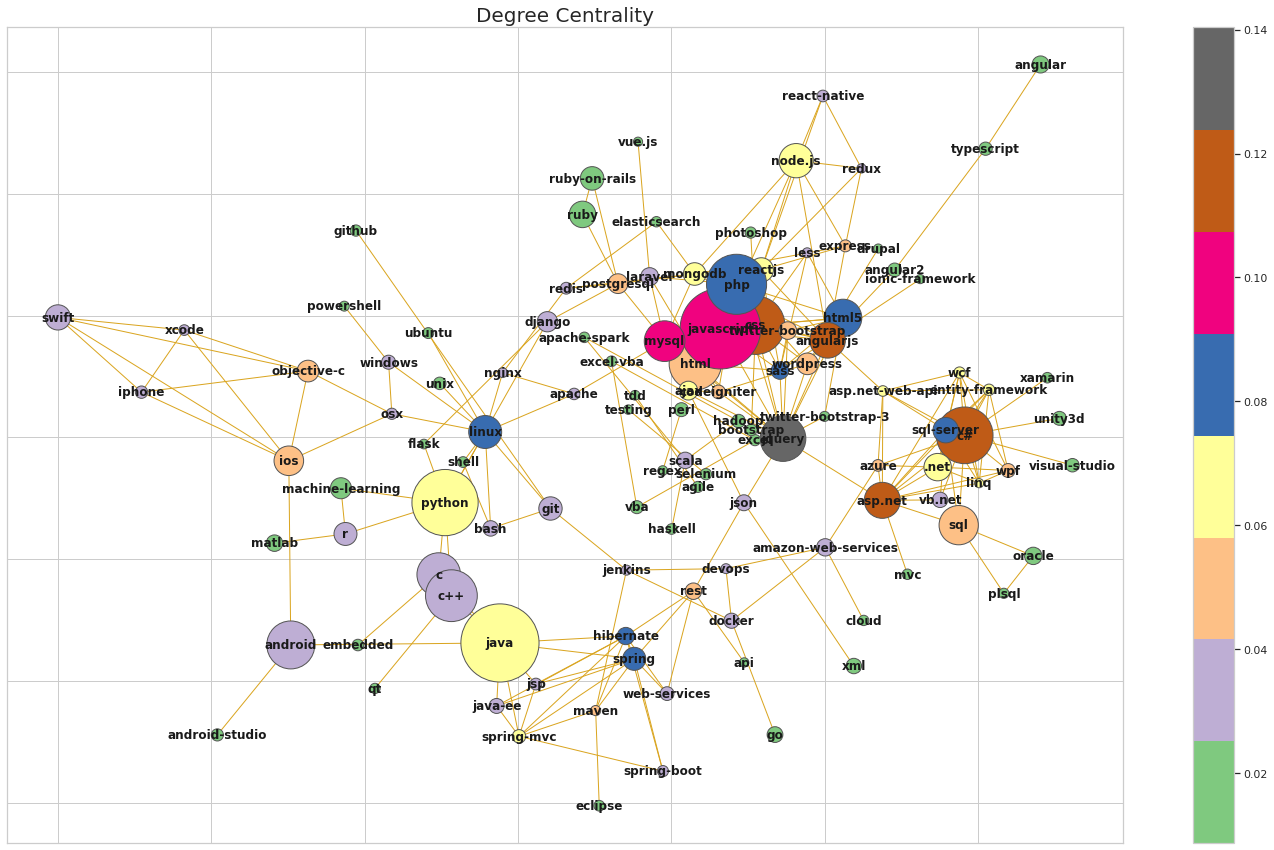

In [ ]:
# pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
pos = nx.kamada_kawai_layout(G)
draw(G, pos, dict(nx.degree_centrality(G)), 'Degree Centrality')

### Closeness Centrality

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers in a single cluster. In our network jquery have the highest closeness centrality. This tells us that jquery is directly connected to some of the important tags in our network. And if will see the network that jquery is close to asp.net that means it is directly connected to asp.net on one side and html, javascript on other side.



##### Top 10 node-tags with highest closeness centrality:

In [ ]:
closeness_dict = nx.closeness_centrality(G) # Run betweenness centrality
# Assign each to an attribute in your network
# nx.set_node_attributes(G, closeness_dict, 'closeness')
sorted_closeness = sorted(closeness_dict.items(),key=lambda x:x[1],reverse=True)
sorted_closeness[:10]

[('jquery', 0.2895872367001647),
 ('mysql', 0.2778958265228288),
 ('ajax', 0.2586198154345401),
 ('css', 0.25787451337276907),
 ('javascript', 0.2571334946561807),
 ('angularjs', 0.2571334946561807),
 ('apache', 0.2549357724796321),
 ('php', 0.2513552138773901),
 ('html', 0.2471891053600853),
 ('asp.net', 0.24650814363733023)]

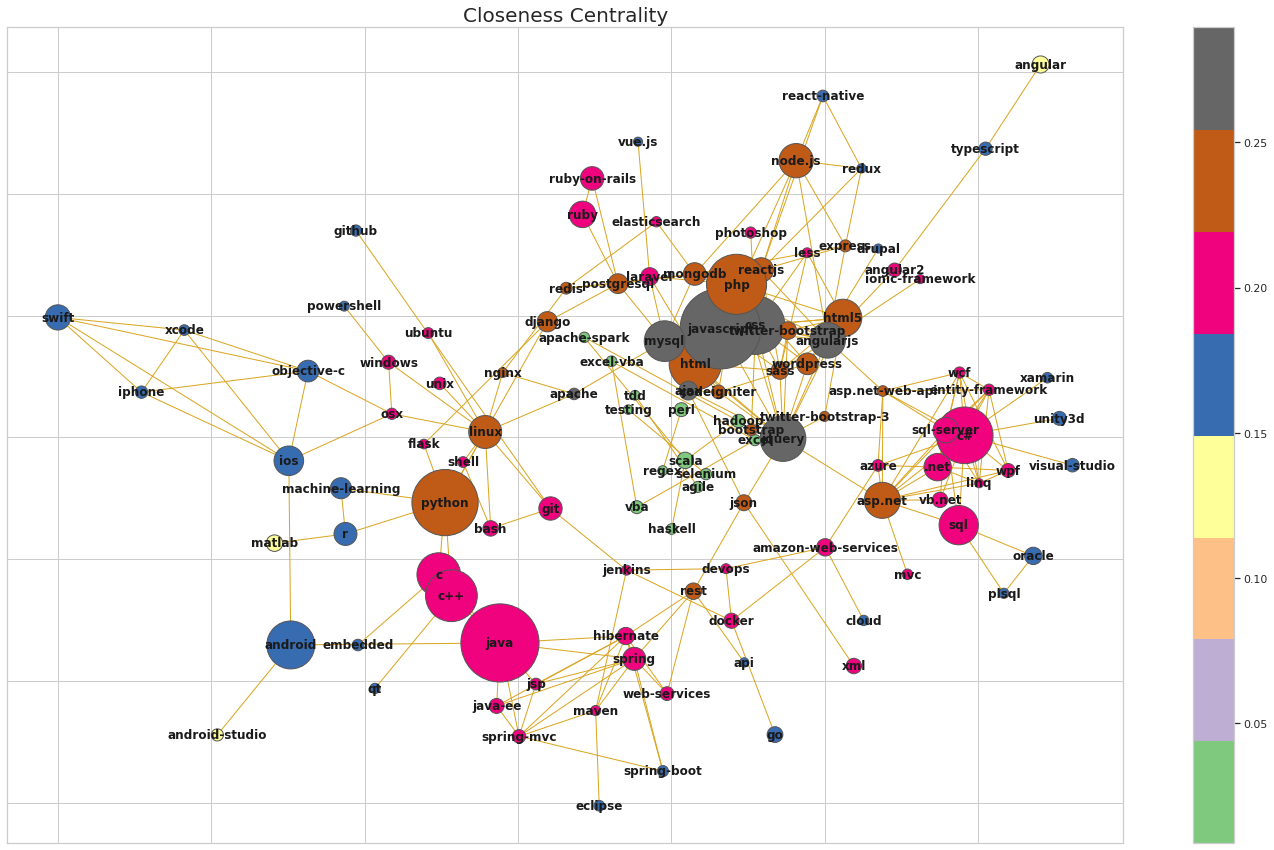

In [ ]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

### Eigen Vector Centrality

Eigenvector centrality is a basic extension of degree centrality, which defines centrality of a node as proportional to its neighbours importance. When we sum up all connections of a node, not all neighbours are equally important.

Observing Eigen vector centrality values, even here we have jQuery in the first position, Which implies that jQuery have direct connection to many other important node which is already popular in our network i.e, have many connection. This can be visualised from graph that jQuery is directly connected to javascript, asp.net and html which are already very popular technology tag in IT world so in our analysis as well they have high number of connections with other node-tag in the network, but one interesting thing we observed about linux node-tag that it is in top 10 list of degree measure but the eigenvector Centrality value is too low (close to 0), so this measure gives you more insight information about important node as compared to degree measure.

Also there are some important nodes which are very popular in real world(IT world) & even have high frequency but the value of Eigen vector centrality is too low close to zero (can be observed clearly from below graph). Like 'Python', 'Java' & 'Android' these are some of the most popular actors of our network which have very high frequency which tells us it occurs many times in the developer stories, But these nodes doesn't have good and popular neighbour in the network due to which importance of these actors  is less and have low Eigen vector centrality value. So in this metrics not only connection with neighbour matters but even what type of connection neighbour have in the network also matters.



##### Top 10 node-tags with highest eigenvector centrality:

In [ ]:
eigenvector_dict = nx.eigenvector_centrality(G) # Run betweenness centrality
# Assign each to an attribute in your network
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
eigenvector = sorted(eigenvector_dict.items(),key=lambda x:x[1],reverse=True)
eigenvector[:10]

[('jquery', 0.3657638453622554),
 ('css', 0.338701180241117),
 ('javascript', 0.32563098638889276),
 ('html5', 0.2681052746250041),
 ('php', 0.26530101525817973),
 ('angularjs', 0.2652026528173442),
 ('sass', 0.2520957761852705),
 ('mysql', 0.239342658253863),
 ('twitter-bootstrap', 0.20709455337131874),
 ('html', 0.2038246927757326)]

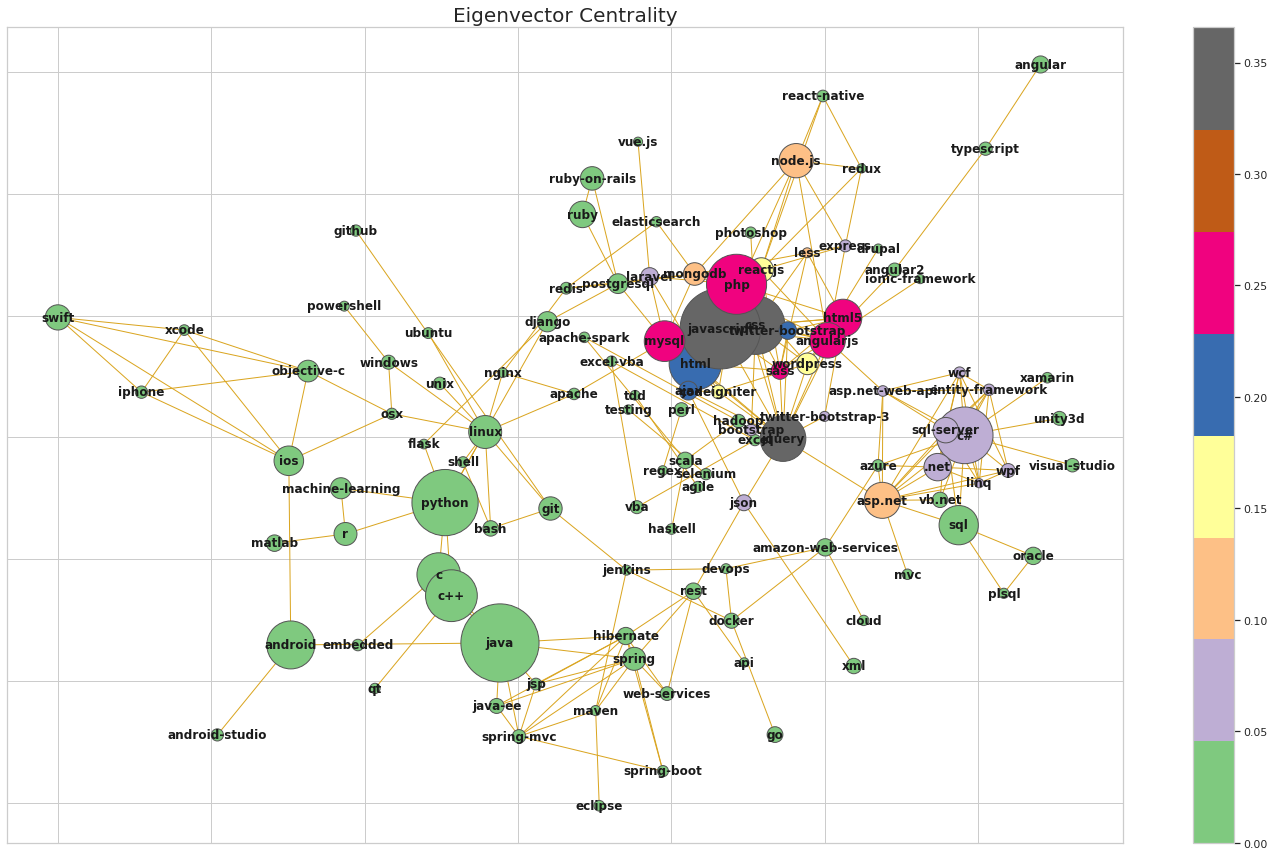

In [ ]:
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

### Betweenness centrality

There are other centrality measures that can tell you about more than just hubs. 

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

Betweenness centrality is a bit different from the other three measures in that it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If we’re the only thing connecting two clusters, every communication between those clusters has to pass through us. In contrast to a hub, this sort of node is often referred to as a broker. Betweenness centrality is not the only way of finding brokerage (and other methods are more systematic), but it’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

From the below graph and by seeing the betweeness centrality of top 10 technology we observe that technology like "Linux" & "MySql" also play a important role in the network. If will see the degree centrality of linux it won't be high becuase it is not connected to many nodes. But it is very important node in the network as it influence the flow around the graph. If will remove `linux` node-tag from the network, there will not be any other tags in the network which will link two major sub-networks i.e, `Python` and `Javascript`.

So when we comapre the values with degree and closeness centrality values, here important nodes like 'JavaScript', 'html', 'css', 'java' have low score. This is because they are dont stand between two groups in our network. they are not helpful when it comes to act as a bridge between two diffent technologies. So this tells us a interesting thing that being popular and having high degree doesn't implies that those are important tags, In some scenario/situation having high betweeness will play a crutial role in the network. If will see the actors like 'jquery', 'mysql', 'json' these are some node-tags connecting two clusters, every communication between those clusters has to pass through them. Like 'json' node-tag stands between the whole cloud technolgies('web-services','rest') with Java based frameworks ('Jquery' and 'ajax').

Interestingly enough, all the high betweenness node-tags shown above are somewhat
“general” ones, in the sense that they are not related with specific software or hardware
platforms. This makes perfect sense intuitively, and it demonstrates how the network structure can capture relations and characteristics in the data that are not easily or directly
expressed in simple aggregate measures, such as the frequency of occurrence.

#### Top 10 node-tags with highest betweenness centrality:

In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(),key=lambda x:x[1],reverse=True)
sorted_betweenness[:10]

[('jquery', 0.2555399753457234),
 ('linux', 0.20840160874161803),
 ('mysql', 0.1976931477327379),
 ('asp.net', 0.17406690608353667),
 ('apache', 0.13087186063431988),
 ('json', 0.12319763505138448),
 ('angularjs', 0.12286762799187795),
 ('rest', 0.11370118004957315),
 ('python', 0.11018306022497917),
 ('postgresql', 0.08761830339613291)]

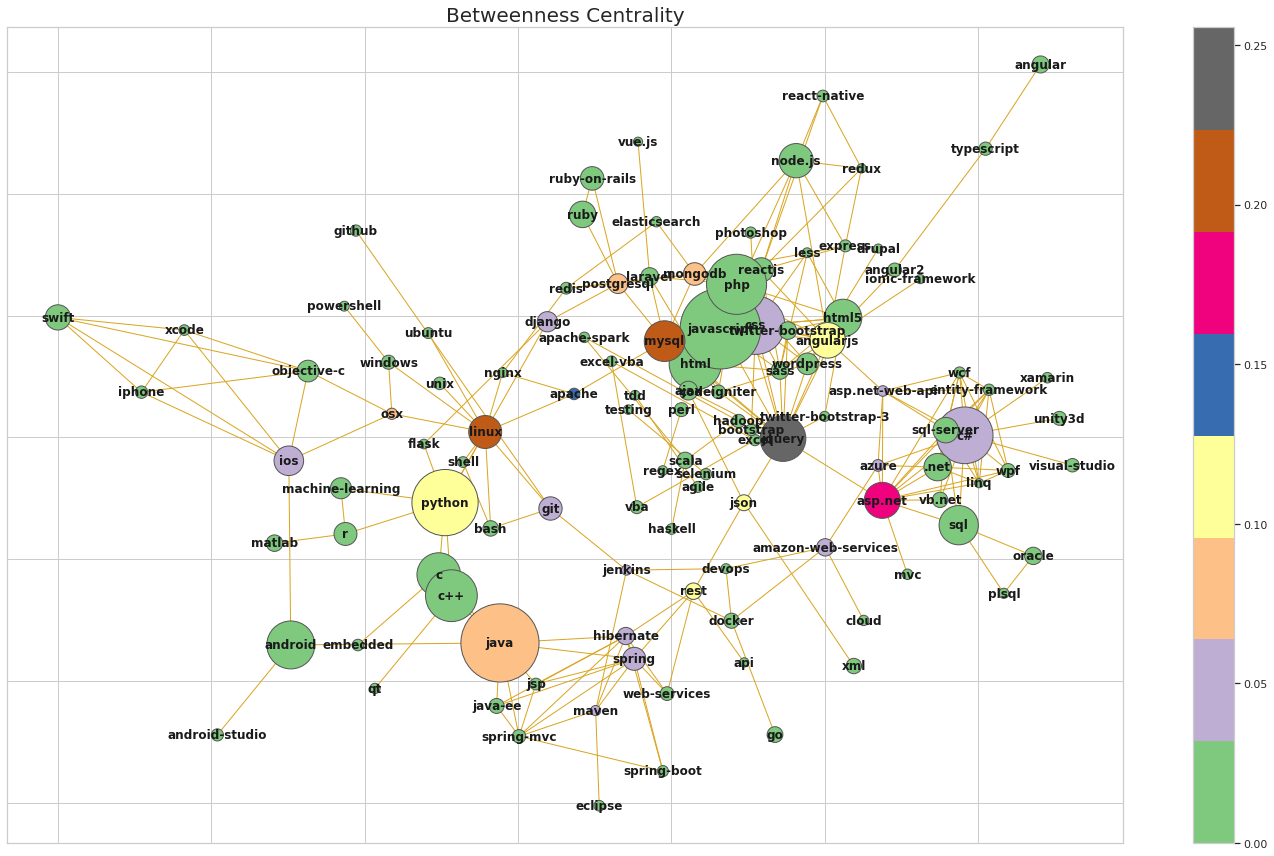

In [ ]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

___After idenfitying the top 10 nodes according to all of the centraliy measures (but they overlap a lot , presumably because it's just a co-occurance network of tags and undirected)  `jquery` is most impotant node-tag in our tag network___

___Also amoung all the centrality measure betweenness centrality and eogenvextor centralotyy measures result can be assumed to proper based on our intution, as it is making more sense when we comapre them with other measures___

### Cliques
In general we consider cliques as groups of people who are closely connected to each other but not connected to people outside the group. In network theory a clique is defined as a maximal complete subgraph of a graph where each node is connected to all the other nodes. The word 'maximal' means that if we add another node to the clique the clique will cease to be a clique. We can also extract all the cliques from the tag network.

In [ ]:
cliques = list(nx.find_cliques(G))
clique_number = len(list(cliques))
print("Number of cliques in Tag Network:",clique_number)



Number of cliques in Tag Network: 89


### Language Specific Ego Network And Cliques  

For each programming language there's a tag in the network. E.g 'python' will refer to the python language. So we can check the cliques that contains that node. We can also visualize the ego network for a node. Ego network for a node is the subgraph containing that node and all its neighbors with a specifed depth range.

Here we can see that the ego network for python with radius 2, which means that we get the subgraph containing python and all it's direct neighbors which are 1 edge away from python and also the nodes which are 2 edge away from python.

Ego networks can be used for checking shortest paths or generally conducting analysis of who is connected to whom, but cliques are helpful because it shows us the data in a more granular way.

In [ ]:
print(nx.ego_graph(G,'python',radius=2).nodes())

['java', 'bash', 'c++', 'apache', 'r', 'flask', 'matlab', 'git', 'ubuntu', 'c', 'nginx', 'postgresql', 'machine-learning', 'python', 'osx', 'qt', 'shell', 'linux', 'django', 'windows', 'embedded', 'unix']


In [ ]:
nx.algorithms.clique.cliques_containing_node(G,"python")

[['r', 'python', 'machine-learning'],
 ['c', 'c++', 'python'],
 ['django', 'python', 'flask'],
 ['linux', 'python']]

Python participates in 4 different cliques, one for web development with django and flask, one for open source development presumably which is connected to linux. One for machine learning where it's adjacent to R. I think the fourth one is for porting python and C/C++ back and forth.

In [ ]:
nx.algorithms.clique.cliques_containing_node(G,"java")

[['java-ee', 'java', 'spring', 'spring-mvc', 'hibernate'],
 ['spring-mvc', 'spring', 'hibernate', 'jsp', 'java'],
 ['android', 'java'],
 ['c', 'c++', 'java']]

Java participates in 4 different cliques, two are for java application development frameworks (spring, hibernate, 'spring-mvc'), one for mobile development with android, One for porting python and C/C++ back and forth.\
Similarly we can see for javascript below:

In [ ]:
nx.algorithms.clique.cliques_containing_node(G,"javascript")

[['jquery',
  'css',
  'javascript',
  'html5',
  'angularjs',
  'sass',
  'twitter-bootstrap'],
 ['jquery', 'css', 'javascript', 'html5', 'php'],
 ['jquery', 'css', 'javascript', 'ajax', 'php', 'mysql'],
 ['jquery', 'css', 'javascript', 'html', 'sass'],
 ['jquery', 'css', 'javascript', 'html', 'php', 'mysql'],
 ['reactjs', 'angularjs', 'sass', 'javascript'],
 ['reactjs', 'angularjs', 'javascript', 'node.js']]

Javascript participates in 7 different cliques, two are for java application development frameworks (spring, hibernate, 'spring-mvc'), one for mobile development with android, One for porting python and C/C++ back and forth.

### Visualize Maximal Clique
It's possible that visualizing the largest cliques will let us see some pattern in the data. We have 3 cliques of size 7 which are the biggest, however we've only taken the unique nodes while extracting the subgraphs, so we can see two different clusters containing javascript and .net related tags. 

In [ ]:
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len,reverse=True)

max_clique_nodes = set()

for nodelist in sorted_cliques[0:3]:
#     print(nodelist)
    for node in nodelist:
#         print(node)
#         print(max_clique_nodes)
        max_clique_nodes.add(node)
max_clique = G.subgraph(max_clique_nodes)
print(nx.info(max_clique))
# print(sorted_cliques)
# list(max_clique_nodes)
# max_clique.node
# sorted_cliques[0:3]

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 49
Average degree:   6.5333


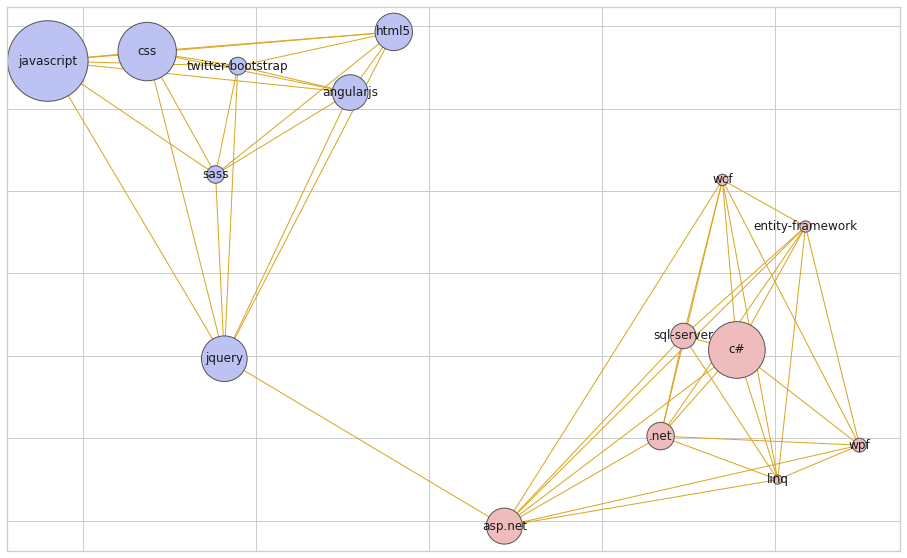

In [ ]:
pos=nx.kamada_kawai_layout(G)
draw_graph(max_clique,pos,size=(16,10))

### Community Detection
For those of you who use Facebook, your Facebook friends probably come from different aspects of your life: Some are your friends from college, others are your co-workers, and maybe some old friends from your hometown.

Because your friends can be broken down into different groups like this, you may wonder if we could identify these different communities in your social network. The answer is yes! Using community detection algorithms, we can break down a social network into different potentially overlapping communities.

The criteria for finding good communities is similar to that for finding good clusters. We want to maximize intra-community edges while minimizing inter-community edges. Formally, the algorithm tries to maximize the modularity of network, or the fraction of edges that fall within the community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges.\

#### Girvan Newman: Edge Betweenness Algorithm

    
The Girvan Newman technique for the detection and analysis of community structure depends upon the iterative elimination of edges with the highest number of the shortest paths that pass through them. By getting rid of the edges, the network breaks down into smaller networks, i.e. communities.


The algorithm, as the name suggests, is introduced by Girvan & Newman. The idea was to find which edges in a network occur most frequently between other pairs of nodes by finding edges betweenness. The edges joining communities are then expected to have high edge betweenness. The underlying community structure of the network will be much fine-grained once we eliminate edges with high edge betweenness. For the removal of each edge, the calculation of edge betweenness is O(EN); therefore, this algorithm’s time complexity is O(E^2N).
We can express Girvan-Newman algorithm in the following procedure:


1) Calculate edge betweenness for every edge in the graph.


2) Remove the edge with highest edge betweenness.


3) Calculate edge betweenness for remaining edges.


4) Repeat steps 2–4 until all edges are removed.


In order to calculate edge betweenness it is necessary to find all shortest paths in the graph. The algorithm starts with one vertex, calculates edge weights for paths going through that vertex, and then repeats it for every vertex in the graph and sums the weights for every edge.

__Limitation Of Girvan__

Although understandable and simple, Girvan Newman Algorithm has its own limitations. The algorithm is not very time efficient with networks containing large number of nodes and data(unless they are very sparse), and it tends to give relatively poor results for dense networks. Communities in huge and complex networks are difficult to detect and therefore, Girvan Newman is not favorable for very larger number of data sets. There then occurred various variations, modifications and designing of other methods of community detection which work on the idea of “Modularity”.


We have an affordably small network with not too complex clustering. As our network contain 115 nodes of many users with less than 415 connections, Girvan Newman Edge Betweenness algorithm would work just fine for detecting communities. 




When we observe the communities created by Girvan using edge betweeness we found some intersting but few weird thing as well. Community 5, 6, 2 are some communities which have same members and occured seperately in Lovian community detection as well and looks related, as all the Big Data related teclnogies makes a separate community becuase developers use those tags together very frequently. Similarly selinium and testing also makes which is also acceptable as mentioned earlier "Selinum" is a tool used by many testers nowdays. But when observe the members of community 0, here all the front-end('css','html'), backend ('java','angularjs','python','c'), framework('Django','flask','ionic') technoligies appears together even Applications development techologies, cloud based technolgies('amazon-webservice')are also present in this communites. Even we can see all the diffrent computer and mobile OS tecnologies in this community('android','ios','linux','unix'). There might be be chances few person in the survey work as an full-stack devlopers and uses most of these technolies togetter but there won't be much scenario like this its hard to belive that all these technoligy tag are used so offen that they have dense network among themsleves and hence apearing in the same community.  



In [ ]:
# Using the Girvan-Newman algorithm to create a Communicty Structure
from networkx.algorithms.community.centrality import girvan_newman
comp=girvan_newman(G)

In [ ]:
# Creating a dictionary for the community number assocaited with each node
com=0
thisdict={}

# Populating the items of the dictionary
for c in next(comp):
    list=sorted(c)
    for i in range(len(list)):
        if list[i] in thisdict:
            print('already found')
        else:
            thisdict.update({list[i]: com})
        i+=1
    com+=1

values_girvan=[thisdict.get(node) for node in G.nodes()]
# values_girvan

Total number of Communities= 7
Modularity: 0.3716711339194898


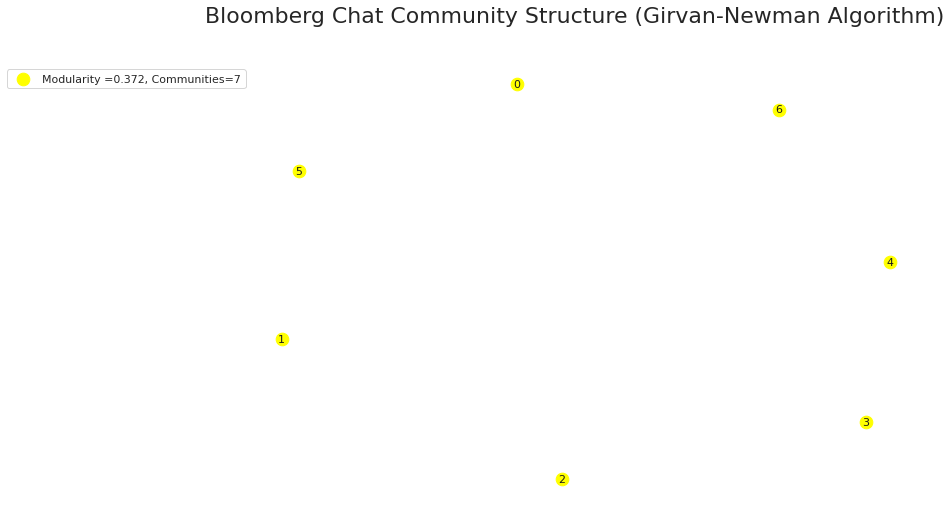

In [ ]:
# Creating a dictionary like 'Community num':'List of participants'
dict_nodes_girvan={}
for each_item in thisdict.items():
    community_num=each_item[1]
    community_node=each_item[0]
    
    if community_num in dict_nodes_girvan:
        value=dict_nodes_girvan.get(community_num) + ' | ' + str(community_node)
        dict_nodes_girvan.update({community_num: value})
    else:
        dict_nodes_girvan.update({community_num: community_node})
        
# Creating the output file
community_df_girvan=pd.DataFrame.from_dict(dict_nodes_girvan, orient='index',columns=['Members'])
community_df_girvan.index.rename('Community Num', inplace=True)
community_df_girvan.to_csv('Community_List_girvan_snippet.csv')

# Creating a graph where each node represents a community
G_comm_girvan=nx.Graph()
G_comm_girvan.add_nodes_from(dict_nodes_girvan)

# Calculation of number of communities and modularity
print("Total number of Communities=", len(G_comm_girvan.nodes()))
mod_girv=community.modularity(thisdict,G)
print("Modularity:", mod_girv)

# Creation of the graph
pos_girvan=nx.spring_layout(G_comm_girvan)
nx.draw_networkx(G_comm_girvan, pos_girvan,with_labels=True,node_size=160,font_size=11, node_color='yellow',
                 label='Modularity =' + str(round(mod_girv,3)) +', Communities=' + str(len(G_comm_girvan.nodes())))
plt.suptitle('Bloomberg Chat Community Structure (Girvan-Newman Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('Girvan-Newman.png', dpi=400, bbox_inches='tight')

#### Community Structure: Louvian Algorithm
The Louvain method for community detection is an algorithm for detecting communities in networks. It maximises a modularity score for each community, where the modularity quantifies the quality of an assignment of nodes to communities. This means evaluating how much more densely connected the nodes within a community are, compared to how connected they would be in a random network.

This algorithm works on the principle of partitioning a network into mutually exclusive communities such that the number of edges across different communities is significantly less than expectation, whereas the number of edges within each community is significantly greater than expectation. The Louvain algorithm is one of the most widely used for identifying communities due its speed and high modularity. Modularity values can span from -1 to 1, and the higher the value, the better the community structure that is formed.

We performed the Louvain algorithm on this dataset, and the results are given in Figure 3. As we see, we have 12 communities, and a modularity of 0.751, which is a pretty good solution. Also we have noticed there are few communities which have most popular languages are in those communities. For example JavaScript, jquery, html and CSS are all in community 0. By seeing the members of all the communities below we observe many interesting thing. We got some communities which looks legitimate by intuition as well as these technology tags are related to each other and they are often comes together like 'hadoop', 'apache-spark', 'scala' and 'haskell' groups together to make a community named 6 in our case, As all of these are Big data technologies and framework so its possible that developer used these tags together. Surprisingly Tags like html, css, javascript, mysql & word-press are making community with photoshop and bootstrap this help us is understanding that people are using these tags together quite frequently. So there will be definitely dense connection between these nodes in the intra community as compare to sparse connections between inter community.

While observing community 3 it also seems acceptable as all the IOS development technologies are appearing together in this community.

If will observe the member of few other communities which is detected by the Louvian is making sense intuitionally as well. Like 'selenium' is making a community with 'testing' which seems true as it is a automation testing tool used by different companies. Similarly 'jenkins', 'docker', 'devops' make a community with amazon-web-services, As all of these are software development & deployment tool used together most of the times in different cloud services.

By seeing all the communities and the members of that community we can say that what are the tags that occur most often with a few important languages like C#, C++, Java, JavaScript, and Python in developers stories and what are the other technologies which appears with these important languages.

In [ ]:
import community
partition=community.best_partition(G, weight='value')
values = [partition.get(node) for node in G.nodes()]

# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
print('Completed Louvain algorithm .. . . ' )
values = [partition.get(node) for node in G.nodes()]
list_com = partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}
# dict_nodes=default 


# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.7450145826254201
Total number of Communities= 14


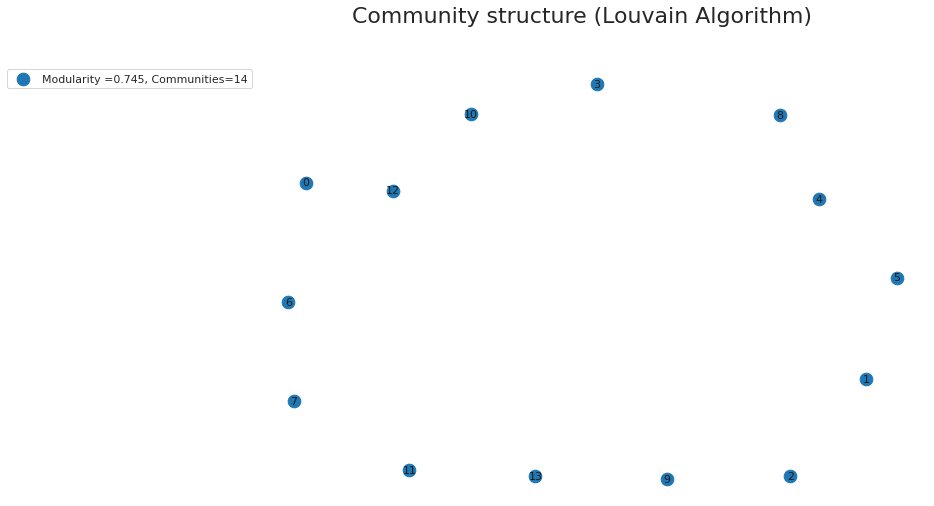

In [ ]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [ ]:
community_df

,Members
Community_Num,
0,html | css | html5 | javascript | jquery | php...
1,hibernate | spring | c | c++ | spring-mvc | sp...
2,ruby | ruby-on-rails | redux | reactjs | react...
3,ios | swift | objective-c | iphone | android |...
4,asp.net | c# | .net | sql-server | entity-fram...
5,hadoop | apache-spark | scala | haskell
6,github | git | apache | nginx | bash | linux |...
7,excel | excel-vba | vba
8,django | python | flask | machine-learning | r...


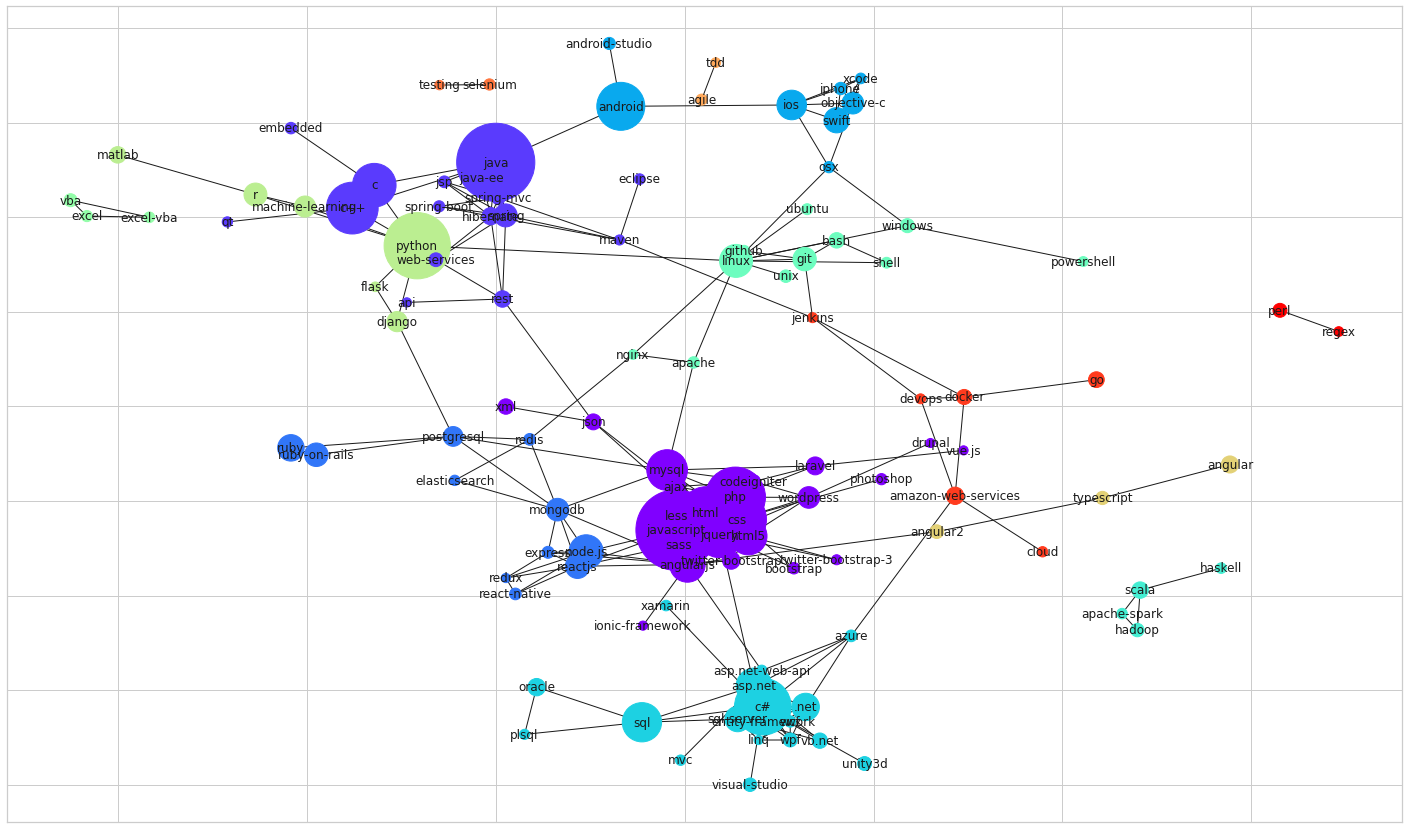

In [ ]:
position = nx.drawing.fruchterman_reingold_layout(G,k=0.70,iterations=60)
# colors = [color_map[G.node[node]['group']] for node in G]
sizes = [d['nodesize']*10 for n,d in G.nodes(data=True)]
plt.figure(figsize=(25,15))

nx.draw_networkx(G, pos = position, cmap = plt.get_cmap("rainbow"), node_color = values, node_size = sizes, with_labels = True)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

So by analysing result of both the algorithm in our network we conclude that Louvian is giving more accurate result by generating 13 communities as compared to girvan and Even we are getting preety high modularity score in Louvian i.e 0.755 as compare Girvan i.e 0.372.